In [4]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [5]:
data1 = pd.read_csv('臺北市街頭隨機搶奪案件點位資訊.csv')
data1

,編號,案類,發生日期,發生時段,發生地點,備註
0,1,搶奪,1070209,02~04,台北市中山區新生北路3段56巷,NaN
1,2,搶奪,1070313,18~20,台北市北投區關渡里知行路316巷22弄1~30號,NaN
2,3,搶奪,1070316,18~20,台北市中正區富水里思源街與永春街口,NaN
3,4,搶奪,1070519,00~02,台北市萬華區(桂林路與柳州街),NaN
4,5,搶奪,1070611,18~20,台北市北投區八仙里西安街2段(與公館路口),NaN
5,6,搶奪,1070706,00~02,台北市中山區林森北路511~540號,NaN
6,7,搶奪,1070730,20~22,台北市內湖區康樂街1~30號,NaN
7,8,搶奪,1071118,04~06,台北市士林區福佳里中正路211~240號,NaN
8,9,搶奪,1071227,12~14,台北市大同區伊寧街75巷(伊寧街),NaN
9,10,搶奪,1080118,12~14,台北市中正區三愛里臨沂街59巷31~60號,NaN


In [6]:
andrew = ['我是台師大科技系陳亮竹']
for sentence in andrew:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\andre\AppData\Local\Temp\jieba.cache
Loading model cost 0.776 seconds.
Prefix dict has been built successfully.


我/是/台師/大/科技/系陳亮/竹


In [7]:
jieba.load_userdict('作業四.txt')

for sentence in andrew:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/台師大/科技系/陳亮竹


In [8]:
data1['seg'] = ""
data1['seg1'] = ""
data1.head()

,編號,案類,發生日期,發生時段,發生地點,備註,seg,seg1
0,1,搶奪,1070209,02~04,台北市中山區新生北路3段56巷,NaN,,
1,2,搶奪,1070313,18~20,台北市北投區關渡里知行路316巷22弄1~30號,NaN,,
2,3,搶奪,1070316,18~20,台北市中正區富水里思源街與永春街口,NaN,,
3,4,搶奪,1070519,00~02,台北市萬華區(桂林路與柳州街),NaN,,
4,5,搶奪,1070611,18~20,台北市北投區八仙里西安街2段(與公館路口),NaN,,


In [9]:
#seg_list = jieba.lcut(documents)
jieba.analyse.set_stop_words('作業四.txt')
index = 0
for documents in data1['發生時段']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    data1['seg'].iloc[index] = seg_list
    index += 1

C:\Users\andre\AppData\Local\Temp\ipykernel_27856\3027664964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['seg'].iloc[index] = seg_list


In [10]:
data1["seg"]

0     [02, 04]
1     [18, 20]
2     [18, 20]
3     [00, 02]
4     [18, 20]
5     [00, 02]
6     [20, 22]
7     [04, 06]
8     [12, 14]
9     [12, 14]
10    [20, 22]
11    [18, 20]
12    [20, 22]
13    [18, 20]
14    [16, 18]
15    [06, 08]
16    [16, 18]
17    [18, 20]
18    [22, 24]
19    [12, 14]
20    [22, 24]
21    [14, 16]
22    [00, 02]
23    [14, 16]
24    [00, 02]
25    [16, 18]
26    [18, 20]
27    [22, 24]
28    [18, 20]
29    [10, 12]
30    [16, 18]
31    [04, 60]
32    [20, 22]
33    [10, 12]
34    [00, 01]
Name: seg, dtype: object

In [11]:
words = list(data1["發生時段"])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [12]:
df = [show_key, show_values]

In [13]:
result = pd.concat(df, axis=1)
result.columns = ['time', 'freguency']
result

,time,freguency
0,02~04,1
1,18~20,8
2,00~02,4
3,20~22,4
4,04~06,1
5,12~14,3
6,16~18,4
7,06~08,1
8,22~24,3
9,14~16,2


In [14]:
timef = data1['發生時段']=="18~20"
timedata = data1[timef]
timedata

,編號,案類,發生日期,發生時段,發生地點,備註,seg,seg1
1,2,搶奪,1070313,18~20,台北市北投區關渡里知行路316巷22弄1~30號,NaN,"[18, 20]",
2,3,搶奪,1070316,18~20,台北市中正區富水里思源街與永春街口,NaN,"[18, 20]",
4,5,搶奪,1070611,18~20,台北市北投區八仙里西安街2段(與公館路口),NaN,"[18, 20]",
11,12,搶奪,1080327,18~20,台北市中正區網溪里廈門街123巷(內),NaN,"[18, 20]",
13,14,搶奪,1080430,18~20,台北市萬華區成都路76巷口弄,NaN,"[18, 20]",
17,18,搶奪,1081205,18~20,台北市萬華區漢中街31~60號,NaN,"[18, 20]",
26,27,搶奪,1091124,18~20,台北市萬華區梧州街31~60號,NaN,"[18, 20]",
28,29,搶奪,1100504,18~20,台北市士林區福安里延平北路7段107巷31~60號,NaN,"[18, 20]",


In [15]:
#seg_list = jieba.lcut(documents)
jieba.analyse.set_stop_words('作業四.txt')
index = 0
for documents in data1['發生地點']:
    seg_list1 = jieba.analyse.extract_tags(documents, 100)
    data1['seg1'].iloc[index] = seg_list1
    index += 1

C:\Users\andre\AppData\Local\Temp\ipykernel_27856\690482576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['seg1'].iloc[index] = seg_list1


In [16]:
data1['seg1']

0                     [新生北路, 56, 中山]
1     [區關, 渡里知, 316, 22, 30, 北投, 行路]
2               [永春, 富水, 中正, 街口, 思源]
3                      [萬華區, 柳州, 桂林]
4               [公館, 北投, 八仙, 路口, 西安]
5               [林森北路, 511, 540, 中山]
6                      [湖區, 康樂街, 30]
7          [區福佳里, 中正路, 211, 240, 士林]
8                [區伊寧街, 75, 伊寧街, 大同]
9        [區三愛里, 臨沂街, 59, 31, 60, 中正]
10                    [萬華區環, 巷口, 河南]
11             [區網, 溪里, 廈門, 123, 中正]
12                 [街紀州, 同安, 中正, 河堤]
13                [成都路, 萬華區, 76, 巷口]
14                 [萬華區, 西街, 桂林, 路口]
15                  [59, 21, 哈密, 大同]
16        [信義區, 四維里, 70, 31, 60, 虎林]
17                 [萬華區, 31, 60, 中街]
18               [萬華區, 121, 150, 武昌]
19              [萬華區, 昆明街, 181, 210]
20         [景行, 里羅斯福路, 391, 420, 文山]
21                 [迪化街, 永樂, 市場, 大同]
22           [區龍安里, 東路, 199, 大安, 和平]
23                    [中山北路, 西街, 中山]
24                 [萬華區, 廣州, 梧州, 街口]
25              [延平北路, 151, 180, 大同]
26                 [萬華區, 31, 60, 梧州]
2

In [17]:
type(data1['seg1'])

pandas.core.series.Series

In [18]:
placedata_seg_list = data1['seg1'].tolist()
type(timedata_seg_list)

NameError: name 'timedata_seg_list' is not defined

In [19]:
placedata_seg_list

[['新生北路', '56', '中山'],
 ['區關', '渡里知', '316', '22', '30', '北投', '行路'],
 ['永春', '富水', '中正', '街口', '思源'],
 ['萬華區', '柳州', '桂林'],
 ['公館', '北投', '八仙', '路口', '西安'],
 ['林森北路', '511', '540', '中山'],
 ['湖區', '康樂街', '30'],
 ['區福佳里', '中正路', '211', '240', '士林'],
 ['區伊寧街', '75', '伊寧街', '大同'],
 ['區三愛里', '臨沂街', '59', '31', '60', '中正'],
 ['萬華區環', '巷口', '河南'],
 ['區網', '溪里', '廈門', '123', '中正'],
 ['街紀州', '同安', '中正', '河堤'],
 ['成都路', '萬華區', '76', '巷口'],
 ['萬華區', '西街', '桂林', '路口'],
 ['59', '21', '哈密', '大同'],
 ['信義區', '四維里', '70', '31', '60', '虎林'],
 ['萬華區', '31', '60', '中街'],
 ['萬華區', '121', '150', '武昌'],
 ['萬華區', '昆明街', '181', '210'],
 ['景行', '里羅斯福路', '391', '420', '文山'],
 ['迪化街', '永樂', '市場', '大同'],
 ['區龍安里', '東路', '199', '大安', '和平'],
 ['中山北路', '西街', '中山'],
 ['萬華區', '廣州', '梧州', '街口'],
 ['延平北路', '151', '180', '大同'],
 ['萬華區', '31', '60', '梧州'],
 ['區建國', '75', '巷內', '三段', '北路', '中山'],
 ['延平北路', '107', '31', '60', '福安', '士林'],
 ['延平北路', '247', '30', '大同'],
 ['區中', '441', '30', '北投'],
 ['區長', '78', '30', '安西', '大

In [28]:
flat = [x for sublist in placedata_seg_list for x in sublist]
diction = Counter(flat)

In [21]:
diction.keys()

dict_keys(['新生北路', '56', '中山', '區關', '渡里知', '316', '22', '30', '北投', '行路', '永春', '富水', '中正', '街口', '思源', '萬華區', '柳州', '桂林', '公館', '八仙', '路口', '西安', '林森北路', '511', '540', '湖區', '康樂街', '區福佳里', '中正路', '211', '240', '士林', '區伊寧街', '75', '伊寧街', '大同', '區三愛里', '臨沂街', '59', '31', '60', '萬華區環', '巷口', '河南', '區網', '溪里', '廈門', '123', '街紀州', '同安', '河堤', '成都路', '76', '西街', '21', '哈密', '信義區', '四維里', '70', '虎林', '中街', '121', '150', '武昌', '昆明街', '181', '210', '景行', '里羅斯福路', '391', '420', '文山', '迪化街', '永樂', '市場', '區龍安里', '東路', '199', '大安', '和平', '中山北路', '廣州', '梧州', '延平北路', '151', '180', '區建國', '巷內', '三段', '北路', '107', '福安', '247', '區中', '441', '區長', '78', '安西', '61', '90', '南港', '新民', '區環', '91', '120', '河北', '南港路'])

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
mask = np.array(Image.open("National_Taiwan_Normal_University_logo.svg.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"


In [24]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)


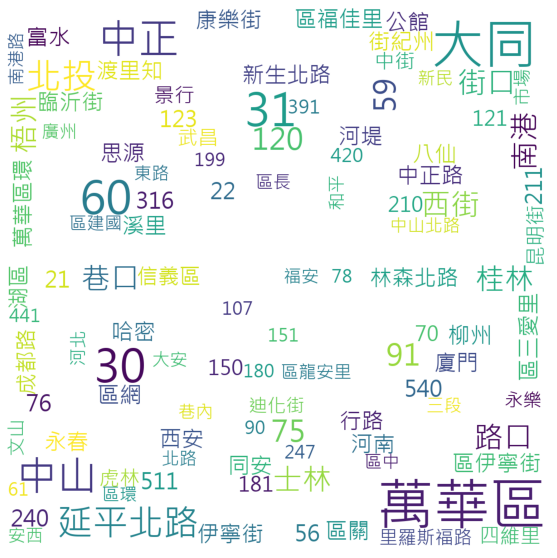

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
crimedata = data1[['發生時段', '發生地點', 'seg','seg1']]

In [27]:
output_series = crimedata.groupby(['發生時段'])['seg'].apply(lambda x: ','.join(x)).reset_index()
output_series

TypeError: sequence item 0: expected str instance, list found